<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sb     
import matplotlib.pyplot as plt     
import datetime
import sklearn
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,precision_recall_curve

from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
file_path_train = '/content/drive/MyDrive/Kaggle/train.csv'            
file_path_test = '/content/drive/MyDrive/Kaggle/test.csv'

df_train = pd.read_csv(file_path_train, header=0)
df_test = pd.read_csv(file_path_test, header=0)


Mounted at /content/drive


<ipython-input-1-9394519a4414>:30: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(file_path_train, header=0)


In [ ]:
# # for kaggle
# # check the files
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         name = os.path.join(dirname, filename)
#         print(name)
        
#         if 'train.csv' in name:
#             train_file_name = name
#         elif 'test.csv' in name:
#             test_file_name = name
            
# print('train data :', train_file_name)
# print('test data  :', test_file_name)

# df_train = pd.read_csv(train_file_name)
# df_test  = pd.read_csv(test_file_name)

In [ ]:
# df_max = df11.groupby('key').idxmax()
# df11=df11.set_index('key')
# df11_unique = df11.iloc[df_max.index]
# df11_unique 

In [ ]:
df = df_train.copy()

In [ ]:
def display_dataframe(df: pd.DataFrame):
  '''Display dataframe and its shape'''
  
  print("Data shape", df.shape)
  display(df.head())
  df.info()


def select_columns_with_nan(df: pd.DataFrame) -> list:
    '''Return a list of column names with NaN values'''
    
    columns_with_nan = df.columns[df.isna().any()].tolist()
    # nan_counts = df.isna().sum()
    # columns_with_nan = nan_counts[nan_counts > 0].index.tolist()
    
    return columns_with_nan
     

def empty_fields(df: pd.DataFrame, columns_with_nan: list = None):
  '''Plot a graph of categories with NaN values only'''

  if columns_with_nan is None:
    columns_with_nan = select_columns_with_nan(df)

  fig, ax = plt.subplots(figsize=(20, 5))

  nan_counts = df[columns_with_nan].isna().sum()

  ax.bar(columns_with_nan, nan_counts)

  ax.set_ylabel('Quantity of empty fields')
  ax.set_title('Non-defined values by category')
  plt.xticks(rotation=90)

  plt.show()


def unique_values_quantity(df: pd.DataFrame):
  '''Plot a graph of unique values quantity per each category'''
  
  # Get the column names and number of unique values for each column
  column_name = df.columns
  unique_quantity = df.nunique()
  
  fig, ax = plt.subplots(figsize=(15, 5))

  ax.bar(column_name, unique_quantity)

  ax.set_ylabel('Quantity of unique values')
  ax.set_title('Unique values quantity by category')
  plt.xticks(rotation=90)

  plt.show()


def drop_nan_columns(df: pd.DataFrame):
  '''Delete all columns which contains NaN values'''
  all_columns = df.columns
  delete_columns = []

  for i in range(len(all_columns)):
    # check for NaN values in the column
    if df[all_columns[i]].isna().any():
      # select the column for deletion if it contain NaN values
      delete_columns.append(all_columns[i])

  # drop the column if it contains NaN values
  clean_data = df.drop(delete_columns, axis=1)

  return clean_data


def encode_objects(df: pd.DataFrame):
  '''LabelEncoder encode all object type columns in dataframe'''
  
  # Create LabelEncoder
  le = LabelEncoder()

  # Transform all object columns to numeric values
  for i in df.columns:
    if df[i].dtype == 'O':
      df[i] = le.fit_transform(df[i])


def labelsToOneHot(df: pd.DataFrame, column: str):
  '''Функция для преобразования столбца данных из pandas DataFrame в OneHot'''

  # Получаем массив уникальных значений для столбца и тот же столбец, но в виде индексов
  vocab, indexes = np.array(np.unique(df[column], return_inverse=True)) 

  # Преобразуем индексы в one-hot
  oneHotData = to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab)) 
  
  # Вернем индексы в one-hot и список уникальных значений
  return oneHotData, vocab.tolist()


def correlation_matrix(df: pd.DataFrame):
  mask_1 = np.tril(df.corr())
  plt.figure(figsize=(32,32))
  sb.heatmap(df.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
  plt.title("Корреляционная матрица", fontsize=20)
  plt.show()

In [ ]:
display_dataframe(df)

Data shape (100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

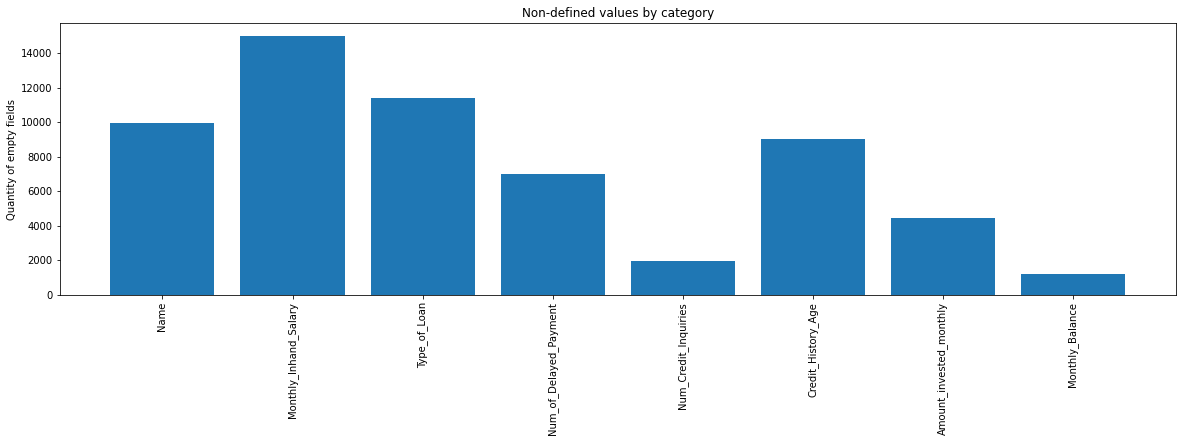

In [ ]:
columns_with_nan = select_columns_with_nan(df)
# plot a graph with NaN values only
empty_fields(df, columns_with_nan)

In [ ]:
df['Credit_Score'] = [x.replace("Poor","-1") for x in df['Credit_Score']]
df['Credit_Score'] = [x.replace("Good","1") for x in df['Credit_Score']]
df['Credit_Score'] = [x.replace("Standard","0") for x in df['Credit_Score']]
df['Credit_Score'] = df['Credit_Score'].astype(int)

df['Payment_Behaviour'] = [x.replace("!@9#%8","nan_spent_nan_value_payments") for x in df['Payment_Behaviour']]

df['Outstanding_Debt'] = [x.replace("_","") for x in df['Outstanding_Debt']]
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df['Credit_Mix'] = [x.replace("_","Unknown") for x in df['Credit_Mix']]

df['Changed_Credit_Limit'] = [x.replace("_","") for x in df['Changed_Credit_Limit']]
df['Changed_Credit_Limit'] = ['-1' if '-' in el else '1' for el in df['Changed_Credit_Limit']]
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(int)

df['Num_of_Loan'] = [x.replace("_","") for x in df['Num_of_Loan']]
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df = df.drop(df[df['Num_of_Loan']<0].index)

df['Occupation'] = ['Unknown' if '_______' in el else el for el in df['Occupation']]

df.drop('SSN', axis=1, inplace=True)

df['Age'] = [x.replace("_","") for x in df['Age']]
df['Age'] = df['Age'].astype(int)
df = df.drop(df[df['Age']<0].index)

df['ID'] = [x.replace("0x","") for x in df['ID']]

df['Annual_Income'] = [x.replace("_","") for x in df['Annual_Income']]
df['Annual_Income'] = df['Annual_Income'].astype(float)

df['Monthly_Inhand_Salary'] = df['Annual_Income']/12

df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)
df['Type_of_Loan'] = [el.lower() for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['auto' if 'auto' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['mortgage' if 'mortgage' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['personal' if 'personal' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['student' if 'student' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['builder' if 'builder' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['home' if 'home' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['consolidation' if 'consolidation' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['payday' if 'payday' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['unknown' if 'nan' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['unknown' if 'not specified' in el else el for el in df['Type_of_Loan']]

df.drop('Name', axis=1, inplace=True)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)
df['Num_of_Delayed_Payment'] = [x.replace("_","") for x in df['Num_of_Delayed_Payment']]
df['Num_of_Delayed_Payment'] = [0 if 'nan' in el else el for el in df['Num_of_Delayed_Payment']]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)
df = df.drop(df[df['Num_of_Delayed_Payment']<0].index)

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)

df['Credit_History_Age'] = df['Credit_History_Age'].fillna(0)

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str)
df['Amount_invested_monthly'] = [x.replace("_","") for x in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = [x.replace("_","") for x in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
for months in range(0,12):
  df['Credit_History_Age_AddMonths'] = [months/12 if f" Years and {months} Months" in el else el for el in df['Credit_History_Age']]
  df['Credit_History_Age'] = [x.replace(f" Years and {months} Months","") for x in df['Credit_History_Age']]
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)
df['Credit_History_Age_AddMonths'] = df['Credit_History_Age_AddMonths'].astype(float)
df['Credit_History_Age'] = df['Credit_History_Age']+df['Credit_History_Age_AddMonths']
df.drop('Credit_History_Age_AddMonths', axis=1, inplace=True)


df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [0 if 'nan' in el else el for el in df['Monthly_Balance']]
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df = df.drop(df[df['Monthly_Balance']<0].index)

In [ ]:

encode_objects(df)
display_dataframe(df)

Data shape (94651, 26)


,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,15561,12320,3,23,12,19114.12,1592.843333,3,4,3,...,3,809.98,26.822620,44.0,1,49.574949,80.415295,2,312.494089,1
1,15571,12320,2,23,12,19114.12,1592.843333,3,4,3,...,1,809.98,31.944960,0.0,1,49.574949,118.280222,3,284.629162,1
3,15592,12320,0,23,12,19114.12,1592.843333,3,4,3,...,1,809.98,31.377862,44.0,1,49.574949,199.458074,5,223.451310,1
4,15603,12320,7,23,12,19114.12,1592.843333,3,4,3,...,1,809.98,24.797347,44.0,1,49.574949,41.420153,1,341.489231,1
5,15613,12320,5,23,12,19114.12,1592.843333,3,4,3,...,1,809.98,27.262259,44.0,1,49.574949,62.430172,6,340.479212,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94651 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        94651 non-null  int64  
 1   Customer_ID               94651 non-null  int64  
 2   Month                     94651 non-null  int64  
 3   Age                       94651 non-null  int64  
 4   Occupation                94651 non-null  int64  
 5   Annual_Income             94651 non-null  float64
 6   Monthly_Inhand_Salary     94651 non-null  float64
 7   Num_Bank_Accounts         94651 non-null  int64  
 8   Num_Credit_Card           94651 non-null  int64  
 9   Interest_Rate             94651 non-null  int64  
 10  Num_of_Loan               94651 non-null  int64  
 11  Type_of_Loan              94651 non-null  int64  
 12  Delay_from_due_date       94651 non-null  int64  
 13  Num_of_Delayed_Payment    94651 non-null  int64  
 14  Change

In [ ]:
# Move target to first column in dataset
y = df['Credit_Score'].copy()
df.drop('Credit_Score',  axis=1, inplace=True)
df.insert(0,'Credit_Score', y)

In [ ]:
# Create X и y
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
# Apply SelectKBest class to extract top 30 best features
model = SelectKBest(score_func=f_regression, k=24)
fit = model.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming dataframe columns
print(featureScores.nlargest(24, 'Score'))  # print 30 best features

                       Specs         Score
12       Delay_from_due_date  21344.978217
17          Outstanding_Debt  16563.777399
19        Credit_History_Age   9129.811870
20     Payment_of_Min_Amount   7720.459263
24           Monthly_Balance   3855.420343
11              Type_of_Loan   2450.116024
16                Credit_Mix   1113.358346
23         Payment_Behaviour   1012.468806
18  Credit_Utilization_Ratio    196.033246
14      Changed_Credit_Limit     50.637794
22   Amount_invested_monthly     11.599238
4                 Occupation     10.021483
7          Num_Bank_Accounts      9.909901
15      Num_Credit_Inquiries      9.841217
10               Num_of_Loan      9.194017
5              Annual_Income      6.111639
6      Monthly_Inhand_Salary      6.111639
13    Num_of_Delayed_Payment      6.088881
1                Customer_ID      3.618290
8            Num_Credit_Card      3.253068
2                      Month      2.586404
3                        Age      2.353315
21       To

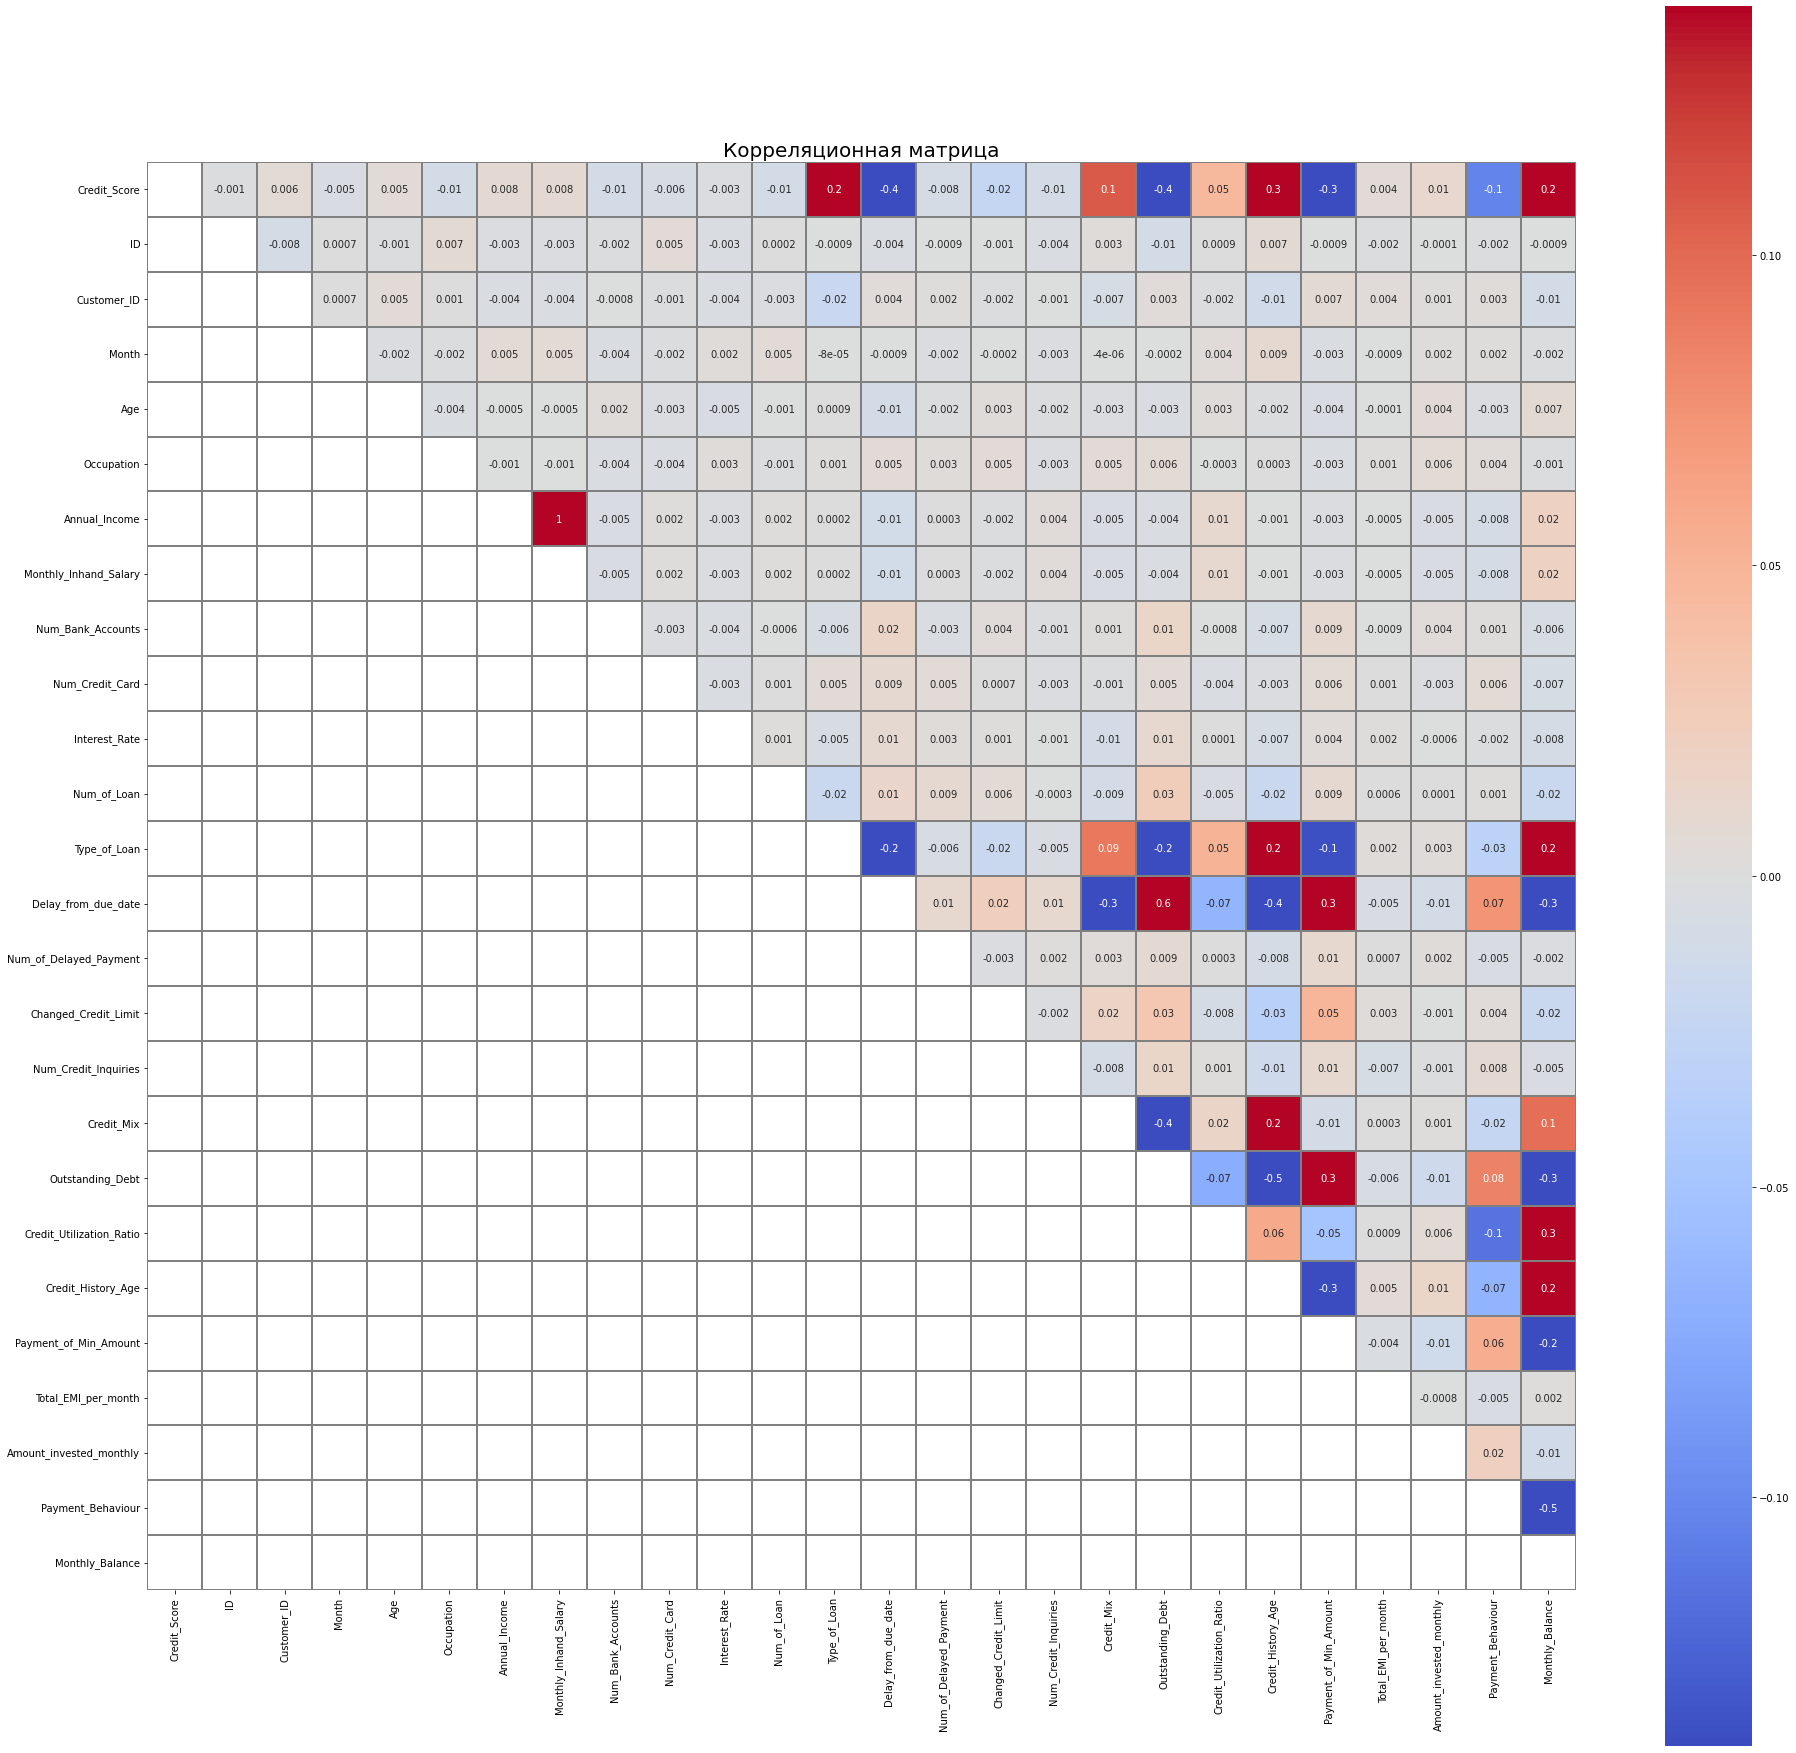

In [ ]:
correlation_matrix(df)

In [ ]:
# Create X и y
X_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (85185, 25)
Размер y_train: (85185,)
Размер x_test: (9466, 25)
Размер y_test: (9466,)


In [ ]:
df = df_test.copy()

In [ ]:
display_dataframe(df)

Data shape (50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

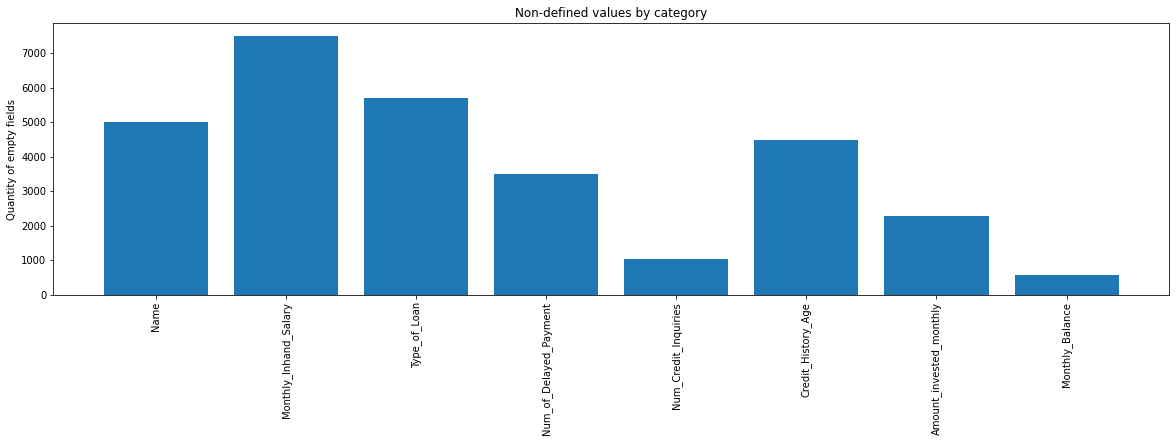

In [ ]:
columns_with_nan = select_columns_with_nan(df)
# plot a graph with NaN values only
empty_fields(df, columns_with_nan)

In [ ]:
df['Payment_Behaviour'] = [x.replace("!@9#%8","nan_spent_nan_value_payments") for x in df['Payment_Behaviour']]

df['Outstanding_Debt'] = [x.replace("_","") for x in df['Outstanding_Debt']]
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df['Credit_Mix'] = [x.replace("_","Unknown") for x in df['Credit_Mix']]

df['Changed_Credit_Limit'] = [x.replace("_","") for x in df['Changed_Credit_Limit']]
df['Changed_Credit_Limit'] = ['-1' if '-' in el else '1' for el in df['Changed_Credit_Limit']]
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(int)

df['Num_of_Loan'] = [x.replace("_","") for x in df['Num_of_Loan']]
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df = df.drop(df[df['Num_of_Loan']<0].index)

df['Occupation'] = ['Unknown' if '_______' in el else el for el in df['Occupation']]

df.drop('SSN', axis=1, inplace=True)

df['Age'] = [x.replace("_","") for x in df['Age']]
df['Age'] = df['Age'].astype(int)
df = df.drop(df[df['Age']<0].index)

df['ID'] = [x.replace("0x","") for x in df['ID']]

df['Annual_Income'] = [x.replace("_","") for x in df['Annual_Income']]
df['Annual_Income'] = df['Annual_Income'].astype(float)

df['Monthly_Inhand_Salary'] = df['Annual_Income']/12

df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)
df['Type_of_Loan'] = [el.lower() for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['auto' if 'auto' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['mortgage' if 'mortgage' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['personal' if 'personal' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['student' if 'student' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['builder' if 'builder' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['home' if 'home' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['consolidation' if 'consolidation' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['payday' if 'payday' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['unknown' if 'nan' in el else el for el in df['Type_of_Loan']]
df['Type_of_Loan'] = ['unknown' if 'not specified' in el else el for el in df['Type_of_Loan']]

df.drop('Name', axis=1, inplace=True)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)
df['Num_of_Delayed_Payment'] = [x.replace("_","") for x in df['Num_of_Delayed_Payment']]
df['Num_of_Delayed_Payment'] = [0 if 'nan' in el else el for el in df['Num_of_Delayed_Payment']]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)
df = df.drop(df[df['Num_of_Delayed_Payment']<0].index)

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)

df['Credit_History_Age'] = df['Credit_History_Age'].fillna(0)

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str)
df['Amount_invested_monthly'] = [x.replace("_","") for x in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = [x.replace("_","") for x in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
for months in range(0,12):
  df['Credit_History_Age_AddMonths'] = [months/12 if f" Years and {months} Months" in el else el for el in df['Credit_History_Age']]
  df['Credit_History_Age'] = [x.replace(f" Years and {months} Months","") for x in df['Credit_History_Age']]
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)
df['Credit_History_Age_AddMonths'] = df['Credit_History_Age_AddMonths'].astype(float)
df['Credit_History_Age'] = df['Credit_History_Age']+df['Credit_History_Age_AddMonths']
df.drop('Credit_History_Age_AddMonths', axis=1, inplace=True)


df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [x.replace("_","") for x in df['Monthly_Balance']]
df['Monthly_Balance'] = [0 if 'nan' in el else el for el in df['Monthly_Balance']]
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df = df.drop(df[df['Monthly_Balance']<0].index)

In [ ]:

encode_objects(df)
display_dataframe(df)

Data shape (47300, 25)


,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,7823,12320,3,23,12,19114.12,1592.843333,3,4,3,...,2022.0,1,809.98,35.030402,44.0,1,49.574949,236.642682,5,186.266702
1,7828,12320,2,24,12,19114.12,1592.843333,3,4,3,...,4.0,1,809.98,33.053114,44.0,1,49.574949,21.465380,1,361.444004
2,7835,12320,1,24,12,19114.12,1592.843333,3,4,3,...,4.0,1,809.98,33.811894,0.0,1,49.574949,148.233938,4,264.675446
3,7841,12320,0,24,12,19114.12,1592.843333,3,4,3,...,4.0,1,809.98,32.430559,46.0,1,49.574949,39.082511,1,343.826873
4,7888,1066,3,28,14,34847.84,2903.986667,2,4,6,...,5.0,1,605.03,25.926822,54.0,1,18.816215,39.684018,0,485.298434


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47300 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        47300 non-null  int64  
 1   Customer_ID               47300 non-null  int64  
 2   Month                     47300 non-null  int64  
 3   Age                       47300 non-null  int64  
 4   Occupation                47300 non-null  int64  
 5   Annual_Income             47300 non-null  float64
 6   Monthly_Inhand_Salary     47300 non-null  float64
 7   Num_Bank_Accounts         47300 non-null  int64  
 8   Num_Credit_Card           47300 non-null  int64  
 9   Interest_Rate             47300 non-null  int64  
 10  Num_of_Loan               47300 non-null  int64  
 11  Type_of_Loan              47300 non-null  int64  
 12  Delay_from_due_date       47300 non-null  int64  
 13  Num_of_Delayed_Payment    47300 non-null  int64  
 14  Change

In [ ]:
X_val=df

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()
# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    from sklearn.metrics import f1_score#,make_scorer

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')
    f1[key] =  f1_score(predictions, y_test, average='weighted')


df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 score'] = f1.values()


df_model

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.583562,0.653652,0.583562,0.603077
Support Vector Machines,0.577118,0.725674,0.577118,0.624886
Decision Trees,0.703465,0.703301,0.703465,0.703379
Random Forest,0.800127,0.801140,0.800127,0.800483
Naive Bayes,0.577118,0.584353,0.577118,0.571662
K-Nearest Neighbor,0.614832,0.633885,0.614832,0.621801


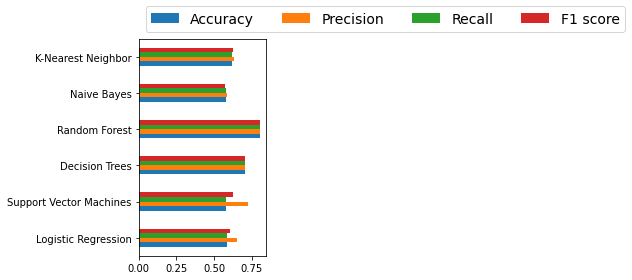

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:
# Tuning RandomForestClassifier For 'n_estimators'
train_accuracies_rf={}
test_accuracies_rf={}

nestimate=np.arange(20,520,20)
for ns in nestimate:

    model_rf = RandomForestClassifier(n_estimators=ns, random_state = 42)
    model_rf.fit(X_train, y_train)
    
    train_accuracies_rf[ns] = model_rf.score(X_train,y_train)
    test_accuracies_rf[ns] = model_rf.score(X_test, y_test)

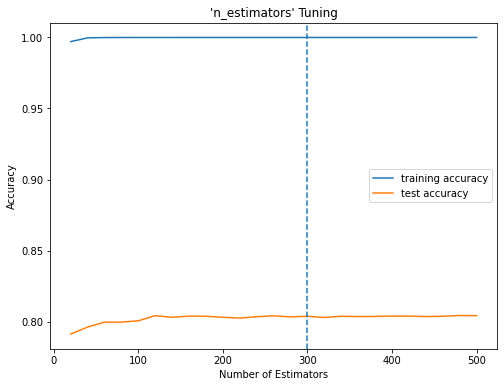

In [ ]:
# Visualizing Model Complexity 
plt.figure(figsize=(8,6))
plt.title("'n_estimators' Tuning")
plt.plot(nestimate, train_accuracies_rf.values(), label="training accuracy"),
plt.plot(nestimate, test_accuracies_rf.values(), label="test accuracy")
plt.legend()
plt.xlabel("Number of Estimators")
plt.axvline(x=300,linestyle="--")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Tuning For max_features
model_rf_features = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features="log2", random_state = 42)
model_rf_features.fit(X_train, y_train)
    
print("Training Accuracy: {}".format(model_rf_features.score(X_train,y_train)))
print("Test Accuracy: {}".format(model_rf_features.score(X_test, y_test)))

Training Accuracy: 1.0
Test Accuracy: 0.8029790830340164


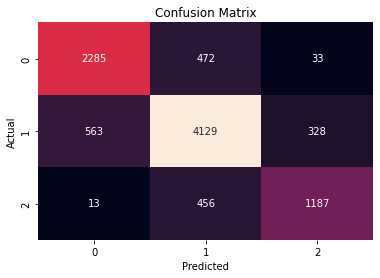

accuracy= 0.8029790830340164


In [ ]:
y_pred = model_rf_features.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
# Create a heatmap of the confusion matrix
sb.heatmap(cm, annot=True, fmt='d', cbar=False)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
print("accuracy=",accuracy)